# Dogs vs. Cats

## 定义函数

In [1]:
# -*- coding=UTF-8 -*-
import os
import shutil
from tqdm import tqdm
from urllib.request import urlretrieve

IF_MKDIR = 0   # 创建的文件夹是否覆盖原来的

def rmdir_mkdir(dirname):
    '''创建文件夹，若存在删除，重新创建
    
    Args:
        dirname:文件夹名
        
    Returns:
        None
    '''
    if os.path.exists(dirname) and IF_MKDIR:
        shutil.rmtree(dirname) # 若存在则删除该文件夹（包括里面的内容
    if IF_MKDIR:
        os.mkdir(dirname)


class DLProgress(tqdm):  
    '''进度条类，继承自tqdm
    '''
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

# if not os.path.isfile(vgg_dir + "vgg19.npy"):
#     with DLProgress(unit='B', unit_scale=True, miniters=1, desc='VGG19 Parameters') as pbar:
#         urlretrieve(
#             'https://s3.amazonaws.com/content.udacity-data.com/nd101/vgg19.npy',
#             vgg_dir + 'vgg19.npy',
#             pbar.hook)
# else:
#     print("Parameter file already exists!")

## 下载数据、解压数据包

In [2]:
import zipfile

if not os.path.isfile('train.zip'):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='Andimal Dataset') as pbar:
        urlretrieve('https://www.kaggle.com/c/dogs-vs-cats/download/train.zip',
                    'train.zip',
                    pbar.hook)
if not os.path.isfile('train.zip'):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='Andimal Dataset') as pbar:
        urlretrieve('https://www.kaggle.com/c/dogs-vs-cats/download/test1.zip',
                    'test1.zip',
                    pbar.hook)

if not os.path.isdir("train"):
    with zipfile.ZipFile('train.zip') as zipp:
        zipp.extractall()
        zipp.close()
        
if not os.path.isdir("test1"):
    with zipfile.ZipFile('test1.zip') as zipp:
        zipp.extractall()
        zipp.close()

## 导入Keras包

In [3]:
from keras.models import *
from keras.layers import *
from keras.applications import *
from keras.preprocessing.image import *

Using TensorFlow backend.


## 图像载入、图片归一化

In [4]:
import numpy as np
from tqdm import tqdm
import cv2

from scipy.misc import imread, imresize, imsave

np.random.seed(42)

n = 25000
X = np.zeros((n, 224, 224, 3), dtype=np.uint8)
y = np.zeros((n, 1), dtype=np.uint8)
# X_test = np.zeros((12500, 224, 224, 3), dtype=np.uint8)

# OpenCV版本
# for i in tqdm(range(int(n/2))):
#     X[i] = cv2.resize(cv2.imread('train/cat.%d.jpg' %i), (224, 224))
#     X[i+int(n/2)] = cv2.resize(cv2.imread('train/dog.%d.jpg' %i), (224, 224))
#     X_test[i] = cv2.resize(cv2.imread('test1/%d.jpg' %(i+1)), (224, 224))

# scipy版本
for i in tqdm(range(int(n/2))):
    X[i] = imresize(imread('train/cat.%d.jpg' %i), (224, 224))
    X[i+int(n/2)] = imresize(imread('train/dog.%d.jpg' %i), (224, 224))

y[int(n/2):] = 1

  0%|                                                                                        | 0/12500 [00:00<?, ?it/s]d:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
d:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
d:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
d:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and w

In [5]:
# 绘制图形
import matplotlib.pyplot as plt
aninal_num = [12500,12500]
plt.bar([0,1],
        aninal_num,
        color=['r','b'],
        tick_label =['Cats','Dogs'],
        label = ['12500','12500'])
# plt.xticks([0,1],('Cats','Dogs'))
plt.text(0,12500,"12500")
plt.text(1,12500,"12500")
plt.show()

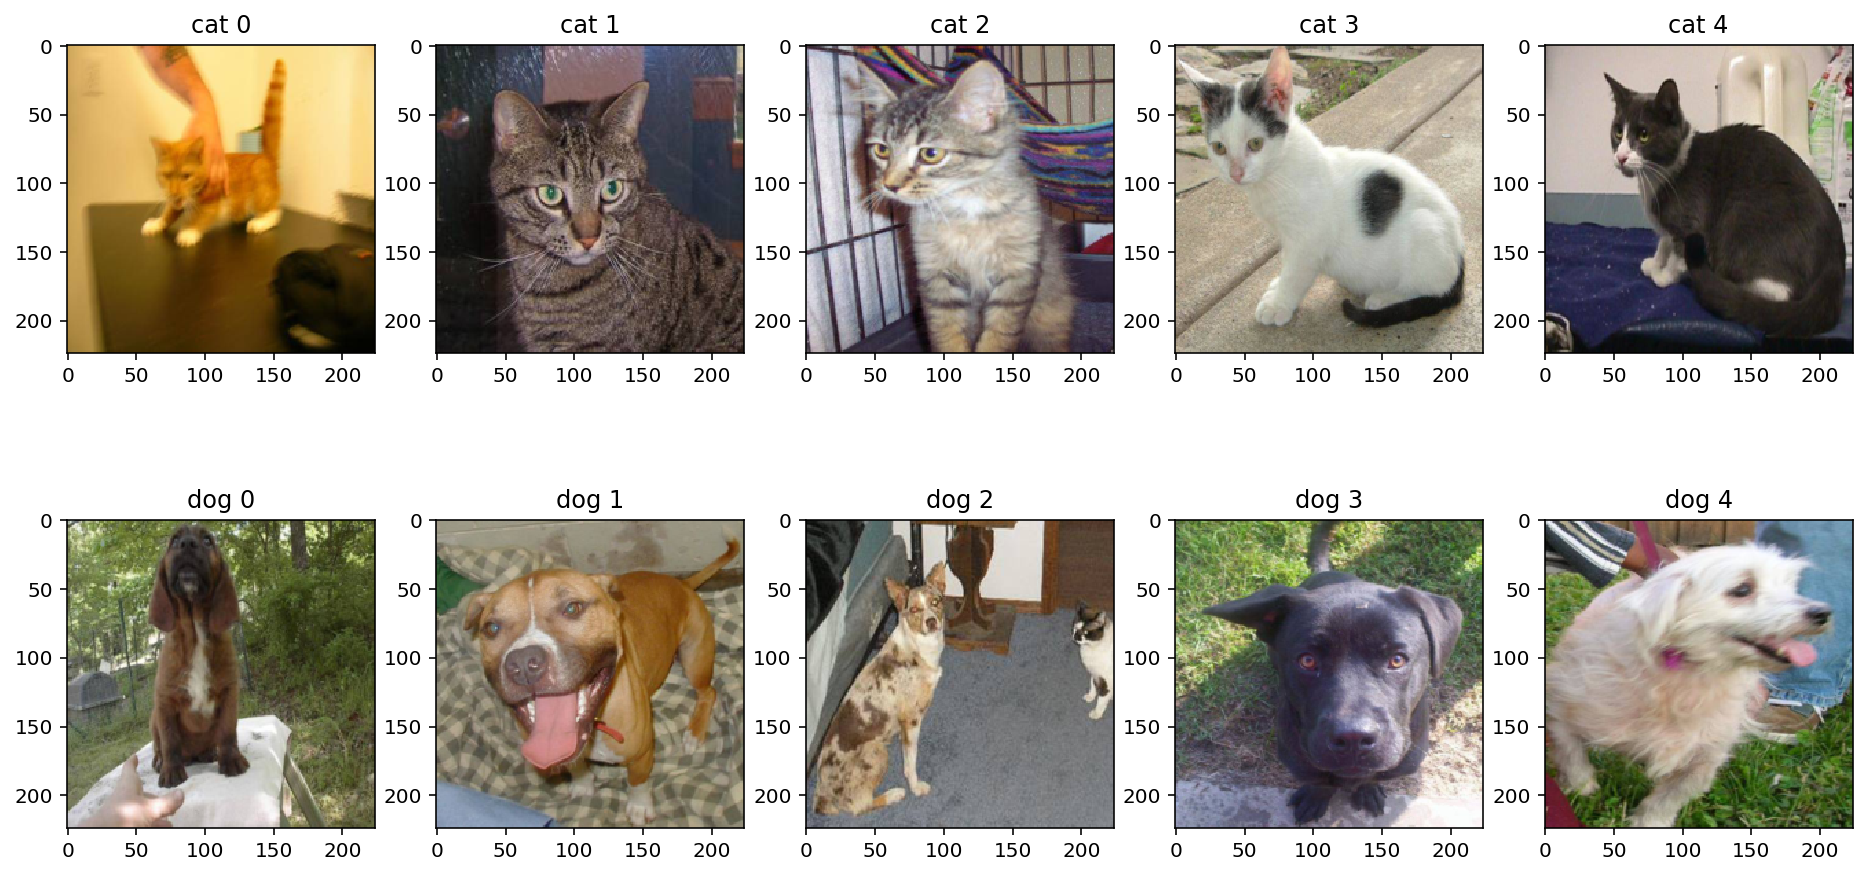

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(16, 8))
# for i in range(10):
#     plt.subplot(2, 5, i+1)

# OpenCV版本
#     if i < 5:
#         plt.title('cat %d' % i)
#         plt.imshow(X[i][:,:,::-1])    # [:,:,::-1]将颜色通道翻转，因为OpenCV颜色通道为BGR，而正常为RGB
#     else:
#         plt.title('dog %d' % (i-5))
#         plt.imshow(X[i+12500][:,:,::-1]) 

# scipy版本
for i in range(10):
    plt.subplot(2, 5, i+1)
     
    if i < 5:
        plt.title('cat %d' % i)
        plt.imshow(X[i]) 
    else:
        plt.title('dog %d' % (i-5))
        plt.imshow(X[i+12500]) 

## 将数据分为训练集、验证集

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

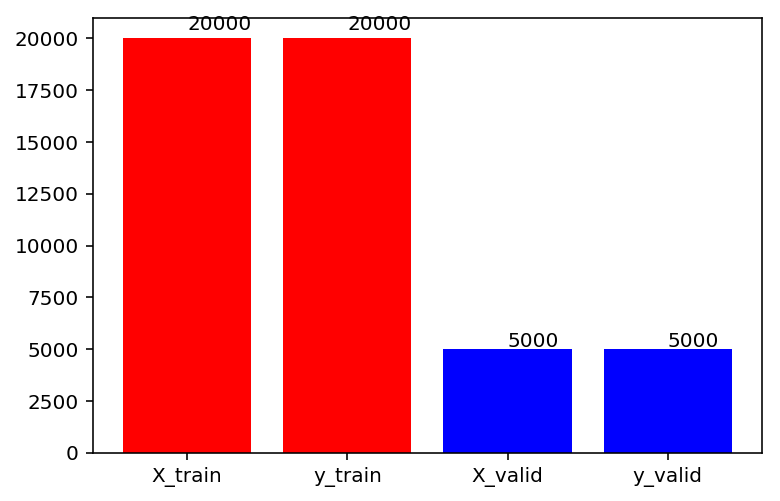

In [8]:
# 绘制图形
import matplotlib.pyplot as plt
%matplotlib inline

aninal_num = [len(X_train),len(y_train),len(X_valid),len(y_valid)]
plt.bar([0,1,2,3],
        aninal_num,
        align='center',
        color=['r','r','b','b'],
        tick_label =['X_train','y_train','X_valid','y_valid'],
        label = [str(len(X_train)),str(len(y_train)),str(len(X_valid)),str(len(y_valid))])

plt.text(0,len(X_train)*1.02,str(len(X_train)))
plt.text(1,len(y_train)*1.02,str(len(y_train)))
plt.text(2,len(X_valid)*1.02,str(len(X_valid)))
plt.text(3,len(y_valid)*1.02,str(len(y_valid)))
plt.show()

## 调用Keras的VGG19模块

In [9]:
base_model = VGG19(input_tensor=Input((224, 224, 3)), weights='imagenet', include_top=False) # ResNet50

for layers in base_model.layers:
    layers.trainable = False

x = base_model.input
    
y = GlobalAveragePooling2D()(base_model.output)
y = Dropout(0.25)(y)
y = Dense(1, activation='sigmoid')(y)
model = Model(x, y)

In [10]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 112, 112, 64) 0           bn_conv1[0][0]                   
__________________________________________________________________________________________________
max_poolin

                                                                 activation_19[0][0]              
__________________________________________________________________________________________________
activation_22 (Activation)      (None, 28, 28, 512)  0           add_7[0][0]                      
__________________________________________________________________________________________________
res4a_branch2a (Conv2D)         (None, 14, 14, 256)  131328      activation_22[0][0]              
__________________________________________________________________________________________________
bn4a_branch2a (BatchNormalizati (None, 14, 14, 256)  1024        res4a_branch2a[0][0]             
__________________________________________________________________________________________________
activation_23 (Activation)      (None, 14, 14, 256)  0           bn4a_branch2a[0][0]              
__________________________________________________________________________________________________
res4a_bran

__________________________________________________________________________________________________
res5b_branch2b (Conv2D)         (None, 7, 7, 512)    2359808     activation_44[0][0]              
__________________________________________________________________________________________________
bn5b_branch2b (BatchNormalizati (None, 7, 7, 512)    2048        res5b_branch2b[0][0]             
__________________________________________________________________________________________________
activation_45 (Activation)      (None, 7, 7, 512)    0           bn5b_branch2b[0][0]              
__________________________________________________________________________________________________
res5b_branch2c (Conv2D)         (None, 7, 7, 2048)   1050624     activation_45[0][0]              
__________________________________________________________________________________________________
bn5b_branch2c (BatchNormalizati (None, 7, 7, 2048)   8192        res5b_branch2c[0][0]             
__________

## 编译、训练模型

In [11]:
model.compile(optimizer='adadelta',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [12]:
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_valid, y_valid))

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
 6496/20000 [========>.....................] - ETA: 20:03 - loss: 0.6741 - acc: 0.65 - ETA: 10:55 - loss: 0.7010 - acc: 0.56 - ETA: 7:52 - loss: 0.7224 - acc: 0.5521 - ETA: 6:20 - loss: 0.7187 - acc: 0.531 - ETA: 5:25 - loss: 0.7278 - acc: 0.525 - ETA: 4:48 - loss: 0.7046 - acc: 0.546 - ETA: 4:22 - loss: 0.6947 - acc: 0.553 - ETA: 4:03 - loss: 0.6864 - acc: 0.574 - ETA: 3:47 - loss: 0.6667 - acc: 0.597 - ETA: 3:35 - loss: 0.6560 - acc: 0.612 - ETA: 3:25 - loss: 0.6444 - acc: 0.627 - ETA: 3:17 - loss: 0.6355 - acc: 0.638 - ETA: 3:10 - loss: 0.6413 - acc: 0.637 - ETA: 3:03 - loss: 0.6307 - acc: 0.647 - ETA: 2:58 - loss: 0.6202 - acc: 0.654 - ETA: 2:53 - loss: 0.6088 - acc: 0.662 - ETA: 2:49 - loss: 0.6073 - acc: 0.661 - ETA: 2:45 - loss: 0.6032 - acc: 0.668 - ETA: 2:42 - loss: 0.5939 - acc: 0.674 - ETA: 2:39 - loss: 0.5890 - acc: 0.678 - ETA: 2:36 - loss: 0.5831 - acc: 0.683 - ETA: 2:34 - loss: 0.5792 - acc: 0.688 - ETA: 2:31 - 

 6528/20000 [========>.....................] - ETA: 1:46 - loss: 0.0589 - acc: 1.000 - ETA: 1:47 - loss: 0.0824 - acc: 0.984 - ETA: 1:46 - loss: 0.0948 - acc: 0.958 - ETA: 1:46 - loss: 0.0997 - acc: 0.953 - ETA: 1:46 - loss: 0.0865 - acc: 0.962 - ETA: 1:46 - loss: 0.0797 - acc: 0.968 - ETA: 1:46 - loss: 0.0895 - acc: 0.964 - ETA: 1:46 - loss: 0.0981 - acc: 0.964 - ETA: 1:45 - loss: 0.1063 - acc: 0.961 - ETA: 1:45 - loss: 0.1050 - acc: 0.962 - ETA: 1:45 - loss: 0.1082 - acc: 0.960 - ETA: 1:45 - loss: 0.1043 - acc: 0.963 - ETA: 1:45 - loss: 0.1085 - acc: 0.959 - ETA: 1:45 - loss: 0.1045 - acc: 0.962 - ETA: 1:44 - loss: 0.1054 - acc: 0.962 - ETA: 1:44 - loss: 0.1042 - acc: 0.962 - ETA: 1:44 - loss: 0.0987 - acc: 0.965 - ETA: 1:44 - loss: 0.0965 - acc: 0.965 - ETA: 1:44 - loss: 0.0970 - acc: 0.965 - ETA: 1:43 - loss: 0.0952 - acc: 0.965 - ETA: 1:43 - loss: 0.0972 - acc: 0.964 - ETA: 1:43 - loss: 0.0951 - acc: 0.965 - ETA: 1:43 - loss: 0.0948 - acc: 0.966 - ETA: 1:43 - loss: 0.0963 - acc: 0

20000/20000 [==============================] - ETA: 36s - loss: 0.0994 - acc: 0.96 - ETA: 35s - loss: 0.0993 - acc: 0.96 - ETA: 35s - loss: 0.0993 - acc: 0.96 - ETA: 35s - loss: 0.0992 - acc: 0.96 - ETA: 35s - loss: 0.0991 - acc: 0.96 - ETA: 35s - loss: 0.0991 - acc: 0.96 - ETA: 35s - loss: 0.0991 - acc: 0.96 - ETA: 34s - loss: 0.0989 - acc: 0.96 - ETA: 34s - loss: 0.0989 - acc: 0.96 - ETA: 34s - loss: 0.0988 - acc: 0.96 - ETA: 34s - loss: 0.0986 - acc: 0.96 - ETA: 34s - loss: 0.0986 - acc: 0.96 - ETA: 33s - loss: 0.0986 - acc: 0.96 - ETA: 33s - loss: 0.0986 - acc: 0.96 - ETA: 33s - loss: 0.0987 - acc: 0.96 - ETA: 33s - loss: 0.0986 - acc: 0.96 - ETA: 33s - loss: 0.0985 - acc: 0.96 - ETA: 33s - loss: 0.0985 - acc: 0.96 - ETA: 32s - loss: 0.0985 - acc: 0.96 - ETA: 32s - loss: 0.0984 - acc: 0.96 - ETA: 32s - loss: 0.0983 - acc: 0.96 - ETA: 32s - loss: 0.0984 - acc: 0.96 - ETA: 32s - loss: 0.0984 - acc: 0.96 - ETA: 32s - loss: 0.0983 - acc: 0.96 - ETA: 31s - loss: 0.0982 - acc: 0.96 - ETA

 6528/20000 [========>.....................] - ETA: 1:45 - loss: 0.0738 - acc: 0.968 - ETA: 1:48 - loss: 0.0576 - acc: 0.968 - ETA: 1:49 - loss: 0.0858 - acc: 0.947 - ETA: 1:49 - loss: 0.0754 - acc: 0.960 - ETA: 1:49 - loss: 0.0661 - acc: 0.968 - ETA: 1:48 - loss: 0.0570 - acc: 0.974 - ETA: 1:48 - loss: 0.0842 - acc: 0.968 - ETA: 1:47 - loss: 0.0913 - acc: 0.968 - ETA: 1:47 - loss: 0.0847 - acc: 0.972 - ETA: 1:47 - loss: 0.0788 - acc: 0.975 - ETA: 1:46 - loss: 0.0740 - acc: 0.977 - ETA: 1:46 - loss: 0.0731 - acc: 0.976 - ETA: 1:46 - loss: 0.0818 - acc: 0.968 - ETA: 1:45 - loss: 0.0880 - acc: 0.966 - ETA: 1:45 - loss: 0.0863 - acc: 0.968 - ETA: 1:45 - loss: 0.0898 - acc: 0.968 - ETA: 1:45 - loss: 0.0877 - acc: 0.970 - ETA: 1:45 - loss: 0.0846 - acc: 0.972 - ETA: 1:45 - loss: 0.0819 - acc: 0.973 - ETA: 1:44 - loss: 0.0786 - acc: 0.975 - ETA: 1:44 - loss: 0.0784 - acc: 0.974 - ETA: 1:44 - loss: 0.0776 - acc: 0.974 - ETA: 1:44 - loss: 0.0776 - acc: 0.974 - ETA: 1:44 - loss: 0.0772 - acc: 0

20000/20000 [==============================] - ETA: 36s - loss: 0.0778 - acc: 0.97 - ETA: 35s - loss: 0.0777 - acc: 0.97 - ETA: 35s - loss: 0.0783 - acc: 0.97 - ETA: 35s - loss: 0.0784 - acc: 0.97 - ETA: 35s - loss: 0.0786 - acc: 0.97 - ETA: 35s - loss: 0.0785 - acc: 0.97 - ETA: 35s - loss: 0.0786 - acc: 0.97 - ETA: 34s - loss: 0.0786 - acc: 0.97 - ETA: 34s - loss: 0.0786 - acc: 0.97 - ETA: 34s - loss: 0.0788 - acc: 0.97 - ETA: 34s - loss: 0.0788 - acc: 0.97 - ETA: 34s - loss: 0.0788 - acc: 0.97 - ETA: 34s - loss: 0.0790 - acc: 0.97 - ETA: 33s - loss: 0.0789 - acc: 0.97 - ETA: 33s - loss: 0.0787 - acc: 0.97 - ETA: 33s - loss: 0.0787 - acc: 0.97 - ETA: 33s - loss: 0.0786 - acc: 0.97 - ETA: 33s - loss: 0.0787 - acc: 0.97 - ETA: 33s - loss: 0.0789 - acc: 0.97 - ETA: 32s - loss: 0.0789 - acc: 0.97 - ETA: 32s - loss: 0.0788 - acc: 0.97 - ETA: 32s - loss: 0.0788 - acc: 0.97 - ETA: 32s - loss: 0.0788 - acc: 0.97 - ETA: 32s - loss: 0.0789 - acc: 0.97 - ETA: 31s - loss: 0.0788 - acc: 0.97 - ETA

 6528/20000 [========>.....................] - ETA: 1:46 - loss: 0.0283 - acc: 1.000 - ETA: 1:47 - loss: 0.0573 - acc: 0.984 - ETA: 1:47 - loss: 0.0470 - acc: 0.989 - ETA: 1:47 - loss: 0.0669 - acc: 0.968 - ETA: 1:47 - loss: 0.0588 - acc: 0.975 - ETA: 1:47 - loss: 0.0617 - acc: 0.974 - ETA: 1:46 - loss: 0.0651 - acc: 0.973 - ETA: 1:46 - loss: 0.0624 - acc: 0.976 - ETA: 1:46 - loss: 0.0585 - acc: 0.979 - ETA: 1:46 - loss: 0.0567 - acc: 0.981 - ETA: 1:46 - loss: 0.0549 - acc: 0.980 - ETA: 1:45 - loss: 0.0574 - acc: 0.979 - ETA: 1:45 - loss: 0.0576 - acc: 0.978 - ETA: 1:45 - loss: 0.0560 - acc: 0.977 - ETA: 1:45 - loss: 0.0601 - acc: 0.977 - ETA: 1:45 - loss: 0.0587 - acc: 0.978 - ETA: 1:45 - loss: 0.0639 - acc: 0.977 - ETA: 1:45 - loss: 0.0772 - acc: 0.974 - ETA: 1:44 - loss: 0.0746 - acc: 0.975 - ETA: 1:44 - loss: 0.0713 - acc: 0.976 - ETA: 1:44 - loss: 0.0689 - acc: 0.977 - ETA: 1:44 - loss: 0.0675 - acc: 0.978 - ETA: 1:44 - loss: 0.0663 - acc: 0.979 - ETA: 1:44 - loss: 0.0653 - acc: 0

20000/20000 [==============================] - ETA: 36s - loss: 0.0712 - acc: 0.97 - ETA: 36s - loss: 0.0711 - acc: 0.97 - ETA: 35s - loss: 0.0710 - acc: 0.97 - ETA: 35s - loss: 0.0710 - acc: 0.97 - ETA: 35s - loss: 0.0709 - acc: 0.97 - ETA: 35s - loss: 0.0708 - acc: 0.97 - ETA: 35s - loss: 0.0709 - acc: 0.97 - ETA: 34s - loss: 0.0708 - acc: 0.97 - ETA: 34s - loss: 0.0707 - acc: 0.97 - ETA: 34s - loss: 0.0706 - acc: 0.97 - ETA: 34s - loss: 0.0709 - acc: 0.97 - ETA: 34s - loss: 0.0707 - acc: 0.97 - ETA: 34s - loss: 0.0708 - acc: 0.97 - ETA: 33s - loss: 0.0709 - acc: 0.97 - ETA: 33s - loss: 0.0709 - acc: 0.97 - ETA: 33s - loss: 0.0710 - acc: 0.97 - ETA: 33s - loss: 0.0711 - acc: 0.97 - ETA: 33s - loss: 0.0710 - acc: 0.97 - ETA: 33s - loss: 0.0709 - acc: 0.97 - ETA: 32s - loss: 0.0709 - acc: 0.97 - ETA: 32s - loss: 0.0708 - acc: 0.97 - ETA: 32s - loss: 0.0708 - acc: 0.97 - ETA: 32s - loss: 0.0707 - acc: 0.97 - ETA: 32s - loss: 0.0706 - acc: 0.97 - ETA: 32s - loss: 0.0704 - acc: 0.97 - ETA

 6528/20000 [========>.....................] - ETA: 1:48 - loss: 0.0167 - acc: 1.000 - ETA: 1:48 - loss: 0.0588 - acc: 0.984 - ETA: 1:47 - loss: 0.0619 - acc: 0.968 - ETA: 1:46 - loss: 0.0570 - acc: 0.976 - ETA: 1:46 - loss: 0.0527 - acc: 0.981 - ETA: 1:46 - loss: 0.0546 - acc: 0.979 - ETA: 1:46 - loss: 0.0547 - acc: 0.982 - ETA: 1:46 - loss: 0.0513 - acc: 0.984 - ETA: 1:46 - loss: 0.0575 - acc: 0.975 - ETA: 1:46 - loss: 0.0547 - acc: 0.978 - ETA: 1:45 - loss: 0.0583 - acc: 0.977 - ETA: 1:45 - loss: 0.0702 - acc: 0.971 - ETA: 1:45 - loss: 0.0652 - acc: 0.973 - ETA: 1:45 - loss: 0.0660 - acc: 0.973 - ETA: 1:45 - loss: 0.0633 - acc: 0.975 - ETA: 1:45 - loss: 0.0680 - acc: 0.972 - ETA: 1:44 - loss: 0.0695 - acc: 0.972 - ETA: 1:44 - loss: 0.0708 - acc: 0.970 - ETA: 1:44 - loss: 0.0681 - acc: 0.972 - ETA: 1:44 - loss: 0.0666 - acc: 0.973 - ETA: 1:44 - loss: 0.0715 - acc: 0.973 - ETA: 1:44 - loss: 0.0738 - acc: 0.973 - ETA: 1:44 - loss: 0.0718 - acc: 0.974 - ETA: 1:43 - loss: 0.0718 - acc: 0

20000/20000 [==============================] - ETA: 36s - loss: 0.0766 - acc: 0.97 - ETA: 35s - loss: 0.0766 - acc: 0.97 - ETA: 35s - loss: 0.0765 - acc: 0.97 - ETA: 35s - loss: 0.0766 - acc: 0.97 - ETA: 35s - loss: 0.0764 - acc: 0.97 - ETA: 35s - loss: 0.0765 - acc: 0.97 - ETA: 35s - loss: 0.0765 - acc: 0.97 - ETA: 34s - loss: 0.0764 - acc: 0.97 - ETA: 34s - loss: 0.0764 - acc: 0.97 - ETA: 34s - loss: 0.0763 - acc: 0.97 - ETA: 34s - loss: 0.0763 - acc: 0.97 - ETA: 34s - loss: 0.0763 - acc: 0.97 - ETA: 34s - loss: 0.0764 - acc: 0.97 - ETA: 33s - loss: 0.0767 - acc: 0.97 - ETA: 33s - loss: 0.0766 - acc: 0.97 - ETA: 33s - loss: 0.0764 - acc: 0.97 - ETA: 33s - loss: 0.0766 - acc: 0.97 - ETA: 33s - loss: 0.0765 - acc: 0.97 - ETA: 33s - loss: 0.0766 - acc: 0.97 - ETA: 32s - loss: 0.0766 - acc: 0.97 - ETA: 32s - loss: 0.0767 - acc: 0.97 - ETA: 32s - loss: 0.0765 - acc: 0.97 - ETA: 32s - loss: 0.0764 - acc: 0.97 - ETA: 32s - loss: 0.0764 - acc: 0.97 - ETA: 31s - loss: 0.0763 - acc: 0.97 - ETA

 6528/20000 [========>.....................] - ETA: 1:45 - loss: 0.0544 - acc: 0.968 - ETA: 1:45 - loss: 0.0664 - acc: 0.968 - ETA: 1:46 - loss: 0.0550 - acc: 0.979 - ETA: 1:46 - loss: 0.0467 - acc: 0.984 - ETA: 1:46 - loss: 0.0494 - acc: 0.981 - ETA: 1:46 - loss: 0.0462 - acc: 0.984 - ETA: 1:45 - loss: 0.0567 - acc: 0.977 - ETA: 1:45 - loss: 0.0516 - acc: 0.980 - ETA: 1:45 - loss: 0.0477 - acc: 0.982 - ETA: 1:45 - loss: 0.0510 - acc: 0.981 - ETA: 1:45 - loss: 0.0479 - acc: 0.983 - ETA: 1:45 - loss: 0.0455 - acc: 0.984 - ETA: 1:45 - loss: 0.0479 - acc: 0.983 - ETA: 1:44 - loss: 0.0447 - acc: 0.984 - ETA: 1:44 - loss: 0.0430 - acc: 0.985 - ETA: 1:44 - loss: 0.0462 - acc: 0.984 - ETA: 1:44 - loss: 0.0455 - acc: 0.985 - ETA: 1:44 - loss: 0.0481 - acc: 0.982 - ETA: 1:44 - loss: 0.0475 - acc: 0.981 - ETA: 1:44 - loss: 0.0463 - acc: 0.982 - ETA: 1:43 - loss: 0.0510 - acc: 0.982 - ETA: 1:43 - loss: 0.0501 - acc: 0.983 - ETA: 1:43 - loss: 0.0523 - acc: 0.982 - ETA: 1:43 - loss: 0.0503 - acc: 0

20000/20000 [==============================] - ETA: 36s - loss: 0.0675 - acc: 0.97 - ETA: 35s - loss: 0.0675 - acc: 0.97 - ETA: 35s - loss: 0.0674 - acc: 0.97 - ETA: 35s - loss: 0.0672 - acc: 0.97 - ETA: 35s - loss: 0.0672 - acc: 0.97 - ETA: 35s - loss: 0.0671 - acc: 0.97 - ETA: 35s - loss: 0.0682 - acc: 0.97 - ETA: 34s - loss: 0.0681 - acc: 0.97 - ETA: 34s - loss: 0.0682 - acc: 0.97 - ETA: 34s - loss: 0.0682 - acc: 0.97 - ETA: 34s - loss: 0.0685 - acc: 0.97 - ETA: 34s - loss: 0.0686 - acc: 0.97 - ETA: 34s - loss: 0.0685 - acc: 0.97 - ETA: 33s - loss: 0.0683 - acc: 0.97 - ETA: 33s - loss: 0.0682 - acc: 0.97 - ETA: 33s - loss: 0.0684 - acc: 0.97 - ETA: 33s - loss: 0.0684 - acc: 0.97 - ETA: 33s - loss: 0.0684 - acc: 0.97 - ETA: 33s - loss: 0.0683 - acc: 0.97 - ETA: 32s - loss: 0.0682 - acc: 0.97 - ETA: 32s - loss: 0.0685 - acc: 0.97 - ETA: 32s - loss: 0.0686 - acc: 0.97 - ETA: 32s - loss: 0.0687 - acc: 0.97 - ETA: 32s - loss: 0.0689 - acc: 0.97 - ETA: 31s - loss: 0.0689 - acc: 0.97 - ETA

## 保存训练好的模型、权重

In [13]:
# 将模型保存为 JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# 将权重保存为 HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


# 加载训练好的模型、权重

In [1]:
# -*- coding:utf-8 -*- 
from keras.models import *
from keras.layers import *
from keras.applications import *
from keras.preprocessing.image import *

# 加载并创建模型
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# 加载权重到新模型
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Using TensorFlow backend.


Loaded model from disk


## 可视化模型

In [3]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(loaded_model).create(prog='dot', format='svg'))

ImportError: Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

In [15]:
import numpy as np
from tqdm import tqdm
import cv2
from scipy.misc import imread, imresize, imsave

np.random.seed(42)

n = 25000
X_test = np.zeros((12500, 224, 224, 3), dtype=np.uint8)

# OpenCV版本
# for i in tqdm(range(int(n/2))):
#     X_test[i] = cv2.resize(cv2.imread('test1/%d.jpg' %(i+1)), (224, 224))

# scipy版本
for i in tqdm(range(int(n/2))):
    X_test[i] = imresize(imread('test1/%d.jpg' %(i+1)), (224, 224))

  0%|                                                                                        | 0/12500 [00:00<?, ?it/s]d:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
d:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
100%|███████████████████████████████████████████████████████████████████████████| 12500/12500 [01:55<00:00, 108.38it/s]


In [16]:
# from IPython.display import SVG
# from keras.utils.vis_utils import model_to_dot

# SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [17]:
list(zip([x.name for x in loaded_model.layers], range(len(loaded_model.layers))))

[('input_1', 0),
 ('conv1', 1),
 ('bn_conv1', 2),
 ('activation_1', 3),
 ('max_pooling2d_1', 4),
 ('res2a_branch2a', 5),
 ('bn2a_branch2a', 6),
 ('activation_2', 7),
 ('res2a_branch2b', 8),
 ('bn2a_branch2b', 9),
 ('activation_3', 10),
 ('res2a_branch2c', 11),
 ('res2a_branch1', 12),
 ('bn2a_branch2c', 13),
 ('bn2a_branch1', 14),
 ('add_1', 15),
 ('activation_4', 16),
 ('res2b_branch2a', 17),
 ('bn2b_branch2a', 18),
 ('activation_5', 19),
 ('res2b_branch2b', 20),
 ('bn2b_branch2b', 21),
 ('activation_6', 22),
 ('res2b_branch2c', 23),
 ('bn2b_branch2c', 24),
 ('add_2', 25),
 ('activation_7', 26),
 ('res2c_branch2a', 27),
 ('bn2c_branch2a', 28),
 ('activation_8', 29),
 ('res2c_branch2b', 30),
 ('bn2c_branch2b', 31),
 ('activation_9', 32),
 ('res2c_branch2c', 33),
 ('bn2c_branch2c', 34),
 ('add_3', 35),
 ('activation_10', 36),
 ('res3a_branch2a', 37),
 ('bn3a_branch2a', 38),
 ('activation_11', 39),
 ('res3a_branch2b', 40),
 ('bn3a_branch2b', 41),
 ('activation_12', 42),
 ('res3a_branch2c'

## 预测测试集

In [18]:
y_pred = loaded_model.predict(X_test, verbose=1)
y_pred = y_pred.clip(min=0.005, max=0.995)

12500/12500 [==============================] - ETA: 10:2 - ETA: 6:0 - ETA: 4: - ETA: 3: - ETA: 3: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - 

In [19]:
y_pred

array([[ 0.995],
       [ 0.995],
       [ 0.995],
       ..., 
       [ 0.995],
       [ 0.995],
       [ 0.005]], dtype=float32)

In [20]:
import pandas as pd
import glob

df = pd.read_csv("sample_submission.csv")

testImageName =glob.iglob('test1/*.jpg') 

for i in range(12500):
    fname = "train1"+str(i)+".jpg"
    value = None
    if  y_pred[i] > 0.5:
        value = 1
    else:
        value = 0
    df.set_value(i, 'label',value)

df.to_csv('pred.csv', index=None)
df.head(10)

d:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


,id,label
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,0.0
5,6,0.0
6,7,0.0
7,8,0.0
8,9,0.0
9,10,0.0
